<h1 style="color:black">Titanic - Machine Learning from Disaster</h1>

<p>A competição do Titanic é uma das mais famosas do <a href="https://www.kaggle.com/">Kaggle</a>, por conta de ser o famoso <strong>"Hello, World!"</strong> no mundo de <strong>Data Science.</strong></p>

<hr />
<h3>História</h3>
<p>O <strong>RMS Titanic foi um navio de passageiros britânico</strong> operado pela White Star Line e construído pelos estaleiros da Harland and Wolff, em Belfast.<br>A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque, em <strong>10 de abril de 1912</strong>, no caminho passando em Cherbourg-Octeville, na França, e por Queenstown, na Irlanda. <strong>Colidiu com um iceberg na proa dianteira do lado direito às 23h40 de 14 de abril, naufragando na madrugada do dia seguinte, com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história.</strong></p>
<p><strong>Fonte:</strong> <a href="https://pt.wikipedia.org/wiki/RMS_Titanic">Wikipedia</a></p>

<hr />
<h3>Objetivo</h3>
<p>Com base em <a href="https://www.kaggle.com/c/titanic">dados disponibilizados pelo Kaggle</a>, o objetivo aqui é <strong> analisar e prever a chance de sobrevivência de um passageiro baseado em suas características nesse trágico naufrágio.</strong></p>

<hr />
<h3>Modelo de Machine Learning</h3>
<p>Para essa análise foi utilizado o modelo de <strong>regressão logística.</strong></p>

<hr />
<h3>Métrica de Desempenho</h3>
<p>O score do modelo foi calculado usando a <strong>métrica de acurácia.</strong></p>

In [1]:
# Importando pacotes essenciais para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Importando os dados de treino
train = pd.read_csv('datasets/train.csv')

In [3]:
# Identificando o tipo das variáveis
display(train.dtypes)

# Analisando as primeiras 5 linhas
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Descrevendo as variáveis
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

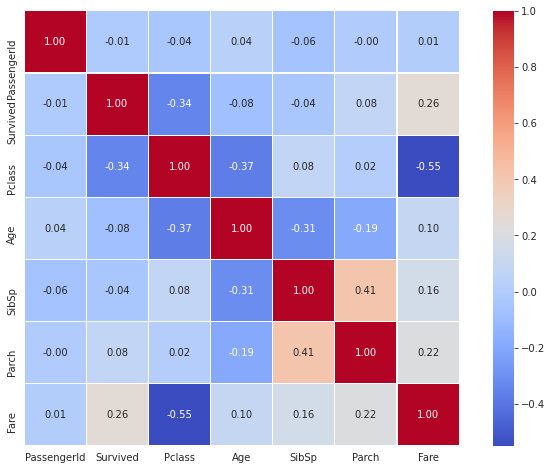

In [5]:
# Analisando a correlação entre as variáveis
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.heatmap(train.corr(), cmap = 'coolwarm', fmt = '.2f', linewidths = 0.1,
            vmax= 1.0, square = True, linecolor = 'white', annot = True)

In [6]:
# Num primeiro momento, será retirado algumas colunas para que o modelo de regressão logistica seja aplicado
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

# Conferindo a alteração
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
# Verificando quais variáveis possuem valores nulos
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
# Para os valores nulos da variável Embarked, será colocado o valor que mais aparece na mesma
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])

train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [9]:
# Separando a variável alvo das preditoras
x = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [10]:
# Encodando as variáveis Sex & Embarked
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
x[:,6] = le.fit_transform(x[:,6])

In [11]:
# Imputando dados nos valores nulos
imputer = KNNImputer(n_neighbors = 3)
x = imputer.fit_transform(x)

In [12]:
# Dividindo os dados de treino & teste
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.1,random_state = 157)

In [13]:
# Aplicando o modelo de regressão logistíca
ml = LogisticRegression()
ml.fit(x_train, y_train)

# Prevendo os valores
y_pred = ml.predict(x_test)

Accuracy:  0.87


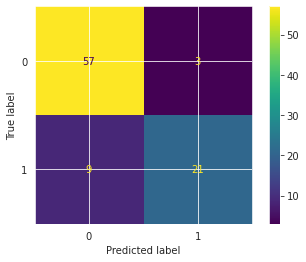

In [14]:
# Resultados do modelo
print('Accuracy: ',"{0:.2f}".format(accuracy_score(y_test, y_pred)))
print(plot_confusion_matrix(ml, x_test, y_test))

In [15]:
# Com o modelo de regressão logistica foi atingido uma acurâcia de 86%
# Porém agora, será utilizado o GridSearchCV para escolher alguns melhores parâmetros para essa análise

# Configurando alguns possíveis parâmetros e fazendo essa busca
params = {
    'fit_intercept': [True, False], 
    'max_iter': [100, 200, 300, 500, 900, 1000, 2000],
    'n_jobs':[-1, 1, 2, 3 ,4],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}
ml = LogisticRegression()
grid = GridSearchCV(ml, params)
grid.fit(x_train, y_train)

# Retornando os melhores parâmetros
grid.best_params_

{'fit_intercept': True, 'max_iter': 100, 'n_jobs': -1, 'solver': 'liblinear'}

In [16]:
# Aplicando o modelo de regressão logistíca
ml = LogisticRegression(fit_intercept = True, max_iter = 100, n_jobs = 4, solver = 'liblinear')
ml.fit(x_train, y_train)

# Prevendo os valores
y_pred = ml.predict(x_test)

Accuracy With GridSearchCV parameters:  0.87


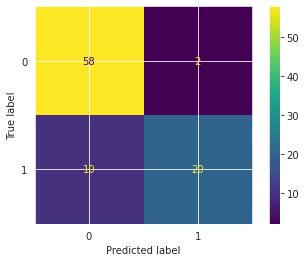

In [17]:
# Resultados do modelo
print('Accuracy With GridSearchCV parameters: ',"{0:.2f}".format(accuracy_score(y_test, y_pred)))
print(plot_confusion_matrix(ml, x_test, y_test))

In [18]:
# Agora iremos usar os dados de teste para avaliarmos o modelo
# Importando os dados de teste
test = pd.read_csv('datasets/test.csv')

In [19]:
# Analisando as primeiras 5 linhas do dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
# Agora iremos igualar o nosso dataframe de teste ao de treino
test = test.drop(['Name','Ticket','Cabin'], axis = 1)

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [21]:
# Verificando os valores nulos
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [22]:
# Definindo a variável alvo
x_test_kg = test.iloc[:,1:].values

In [23]:
# Encodando as variáveis Sex & Embarked
le = LabelEncoder()
x_test_kg[:,1]= le.fit_transform(x_test_kg[:,1])
x_test_kg[:,6]= le.fit_transform(x_test_kg[:,6])

In [24]:
# Imputando dados nos valores nulos
imputer = KNNImputer(n_neighbors = 3)
x_test_kg = imputer.fit_transform(x_test_kg)

In [25]:
# Prevendos os valores
y_pred = ml.predict(x_test_kg)

In [26]:
# Criando CSV para submissão no Kaggle
submission = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


<h3>Resultado Final</h3>
<ul>
    <li><strong>Regressão Logística - Acurácia de 87%</strong></li>
    <li><strong>Regressão Logística com GridSearchCV - Acurácia de 87%</strong></li>
</ul>

<h3>Considerações Finais</h3>
<p>É observável que o modelo de <strong>regressão logística com ou sem o GridSearchCV</strong> apresentou uma <strong>acurácia de 87%</strong>, assim chegando a conclusão que é um bom ínicio, claramente é possível aumentar ainda mais essa acurácia, <strong>tunando de maneira diferente os hiperparâmetros ou selecionando e explorando melhor as variáveis preditoras.</strong></p>